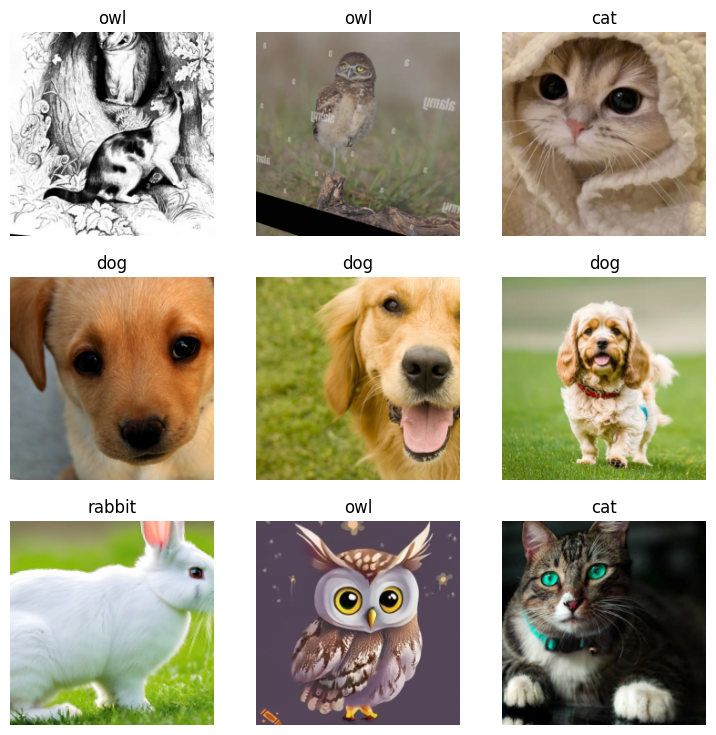

In [5]:
from fastai.vision.all import *
from pathlib import Path

# TODO - change the path!
path = Path('/Users/annatribulikova/Downloads/data seminar /dspracticum2025-damian/animals_dataset') / 'train'

dls = ImageDataLoaders.from_folder(
    path,                 # Path to the train folder
    train='.',            # Use the entire train folder for splitting
    valid_pct=0.2,        # 20% of the data will be used for validation
    seed=42,              # Set a seed for reproducibility
    item_tfms=Resize(460),# Resize the images to 460x460 (or your desired size)
    batch_tfms=aug_transforms(size=224, min_scale=0.75), # Data augmentation 
    bs=64                 # Batch size 64
)

dls.show_batch(max_n=9)

In [2]:
import timm
import os

import matplotlib.pyplot as plt
import PIL
from PIL import Image
import json

import torch
import torchvision
from torchvision import datasets, transforms
from torchsummary import summary

from fastai.vision.all import *


In [3]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/annatribulikova/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:01<00:00, 38.4MB/s]


In [7]:
learn.model = learn.model.cpu()
learn.lr_find()

RuntimeError: Adaptive pool MPS: input sizes must be divisible by output sizes. Non-divisible input sizes are not implemented on MPS device yet. For now, you can manually transfer tensor to cpu in this case. Please refer to [this issue](https://github.com/pytorch/pytorch/issues/96056)

In [ ]:
lr =  # set optimal learning rate here
epochs =  # set number of one-cycles for training, try to experiment a bit